In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import randn
import numpy as np

In [2]:
sample_df = pd.read_csv("LeaveTimes_APR_39A.csv")
#sample_df = sample_df.drop(['Passengers', 'Passengersin','Distance', 'Suppresed','JustificationId','LastUpdate','Note'], axis=1)
days = sample_df.DayOfService.unique()
print(days)

['2017-04-01' '2017-04-04' '2017-04-02' '2017-04-03' '2017-04-06'
 '2017-04-07' '2017-04-15' '2017-04-12' '2017-04-08' '2017-04-18'
 '2017-04-13' '2017-04-19' '2017-04-05' '2017-04-24' '2017-04-25'
 '2017-04-26' '2017-04-10' '2017-04-11' '2017-04-20' '2017-04-14'
 '2017-04-21']


In [3]:
sample_df = sample_df.drop_duplicates(subset=None, keep='first', inplace=False)

In [4]:
sample_df['StopPointId'].unique()

array([1898, 1702, 6111, 1699,  752,  753, 1905,  748, 1701, 1698, 7021,
        756, 1697, 1858,  747,  754, 1906,  780, 1807,  781,  779, 7586,
       1899, 1660, 1661, 1806, 6107, 1703, 6109, 1666, 6112,  750,  757,
       6113, 1700, 1859, 4492,  751,  749, 1879, 1808, 1805, 7020,  793,
       7167, 7030, 1861, 1907, 1665, 7029,  785, 2171, 7576, 7158, 7048,
       7159, 7017, 7018, 1860, 1862, 1864, 1865, 1866, 1850, 4489, 4747,
       1845, 7166, 1696, 1908, 1909, 1713, 1714, 1715, 7453, 1478, 1479,
       7388, 1863, 1867, 1847,  315,  313, 6110, 7038, 7011, 7160, 7161,
       7162,  767,  768,  769,  770,  771,  772,  773,  774,  775,  776,
        777,  782,  783,  784, 7588,  328, 1443, 1444, 1647, 1648, 1649,
       1911, 1914, 1662, 1664, 7389, 7025, 1869, 1870, 1871, 1872, 1874,
       1875, 1876, 1877, 6108, 7587, 1445, 1913, 4464, 1873, 1878, 7047,
        786,  335,  349,  404,  755,  758,  759,  760,  761,  762,  763])

In [17]:
count = 0

D = []
L = []
E = []
for day in days:
    oneday_df = sample_df[(sample_df['StopPointId']==1866) & (sample_df['DayOfService']==day)]
    oneday_df['isDelay'] = 0
    for i in oneday_df.index:
        #print(oneday_df.loc[i])
        #print(i)
        oneday_df['isDelay'].loc[i] = oneday_df['ActualTime_Arr'].loc[i] - oneday_df['PlannedTime_Arr'].loc[i]
    lateTimes = oneday_df[(oneday_df['isDelay'] >= 0)].isDelay.count()
    earlyTimes = oneday_df[(oneday_df['isDelay'] < 0)].isDelay.count()
    if lateTimes == 0 and earlyTimes == 0:
        continue
    D.append(day)
    L.append(lateTimes)
    E.append(earlyTimes)
    plot_df = pd.DataFrame({'Date': D, 'LateTimes': L, 'EarlyTimes': E})
    #if count == 3:
    #    break
    #else:
    #    count += 1
    print("{}, lateTimes: {}, earlyTimes: {}".format(day, lateTimes, earlyTimes))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


2017-04-04, lateTimes: 54, earlyTimes: 39
2017-04-02, lateTimes: 30, earlyTimes: 9
2017-04-03, lateTimes: 55, earlyTimes: 35
2017-04-06, lateTimes: 56, earlyTimes: 32
2017-04-07, lateTimes: 53, earlyTimes: 34
2017-04-15, lateTimes: 18, earlyTimes: 45
2017-04-12, lateTimes: 39, earlyTimes: 52
2017-04-08, lateTimes: 39, earlyTimes: 22
2017-04-18, lateTimes: 20, earlyTimes: 72
2017-04-13, lateTimes: 35, earlyTimes: 54
2017-04-19, lateTimes: 32, earlyTimes: 55
2017-04-05, lateTimes: 52, earlyTimes: 38
2017-04-25, lateTimes: 37, earlyTimes: 52
2017-04-26, lateTimes: 52, earlyTimes: 40
2017-04-10, lateTimes: 26, earlyTimes: 62
2017-04-11, lateTimes: 27, earlyTimes: 65
2017-04-20, lateTimes: 34, earlyTimes: 53
2017-04-14, lateTimes: 22, earlyTimes: 70
2017-04-21, lateTimes: 28, earlyTimes: 51


In [18]:
my_plot = plot_df.copy()

In [19]:
my_plot = my_plot.sort_values(by='Date').reset_index(drop=True)

In [20]:
my_plot

,Date,EarlyTimes,LateTimes
0,2017-04-02,9,30
1,2017-04-03,35,55
2,2017-04-04,39,54
3,2017-04-05,38,52
4,2017-04-06,32,56
5,2017-04-07,34,53
6,2017-04-08,22,39
7,2017-04-10,62,26
8,2017-04-11,65,27
9,2017-04-12,52,39


In [21]:
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import randn
import numpy as np

[Text(0,0,'2017-04-02'),
 Text(0,0,'2017-04-03'),
 Text(0,0,'2017-04-04'),
 Text(0,0,'2017-04-05'),
 Text(0,0,'2017-04-06'),
 Text(0,0,'2017-04-07'),
 Text(0,0,'2017-04-08'),
 Text(0,0,'2017-04-10'),
 Text(0,0,'2017-04-11'),
 Text(0,0,'2017-04-12'),
 Text(0,0,'2017-04-13'),
 Text(0,0,'2017-04-14'),
 Text(0,0,'2017-04-15'),
 Text(0,0,'2017-04-18'),
 Text(0,0,'2017-04-19'),
 Text(0,0,'2017-04-20'),
 Text(0,0,'2017-04-21'),
 Text(0,0,'2017-04-25'),
 Text(0,0,'2017-04-26')]

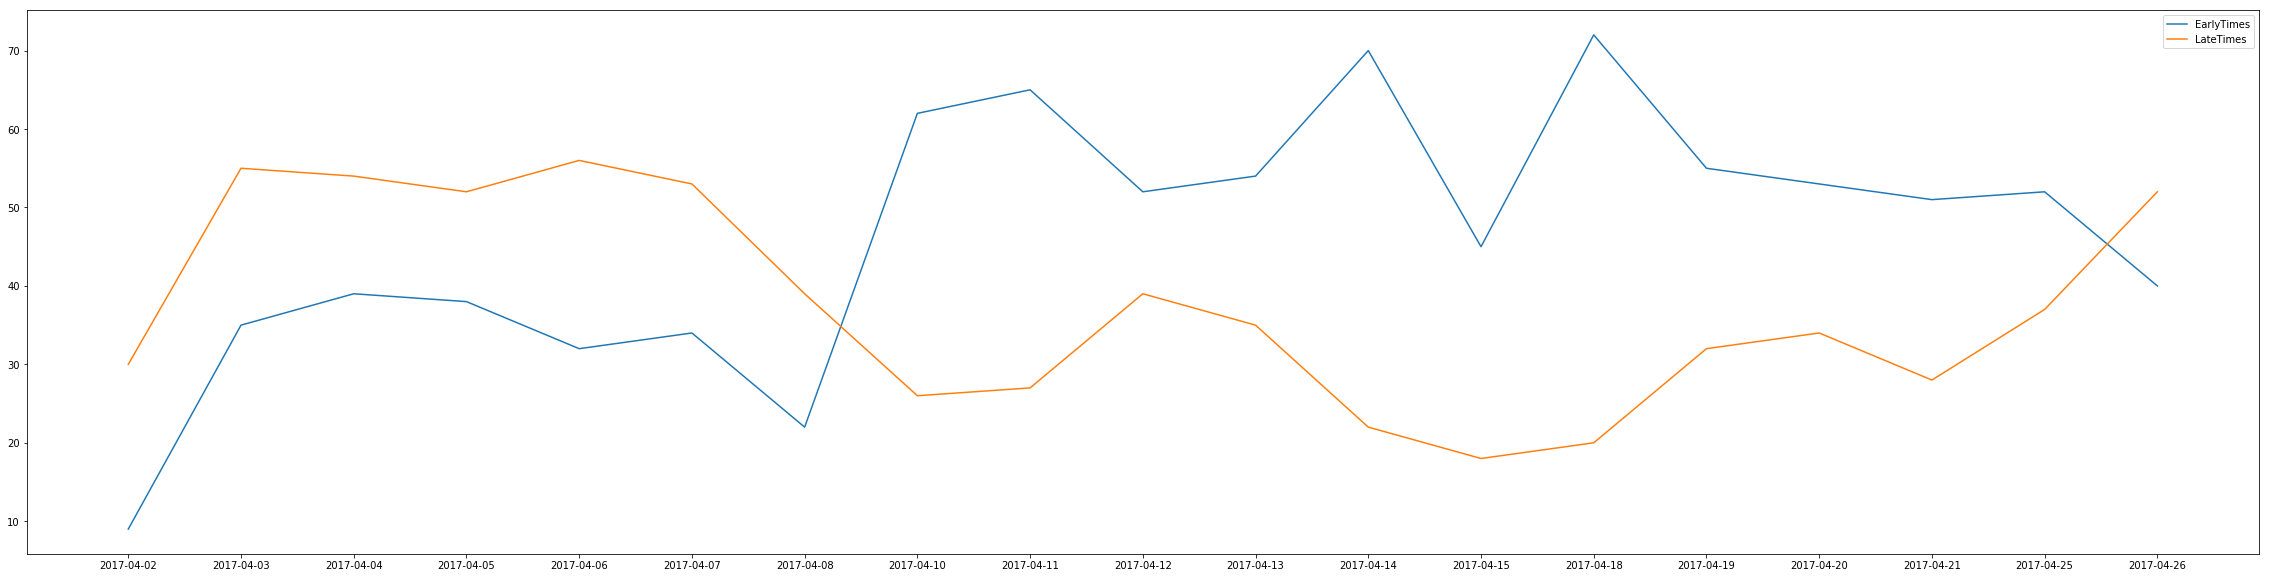

In [22]:
ax = my_plot[['EarlyTimes', 'LateTimes']].plot(xticks=plot_df.index, figsize=(40,10))
ax.set_xticklabels(my_plot.Date)

In [ ]:
plt.figure()
plot_df.plot(figsize=(30, 10))